<a href="https://colab.research.google.com/github/leadeeerq/Projects/blob/main/DummyDataGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mock/dummy data generation

##Data preparation

In [3]:
import pandas as pd
import numpy as np
import datetime
import random

In [36]:
products = {
    #Product to price and weight (occurance) dict
    'iPhone': [1300.99, 6],
    'Xiaomi Phone': [600, 5],
    'Samsung Phone': [820, 3],
    'Monitor 24"': [120.99, 4],
    'Monitor 28"': [299.99, 2],
    'Electric brush': [15.99, 5],
    'Lenovo Thinkpad': [1300, 2],
    'Lenovo G15': [2100.99, 1],
    'Razer Deathadder': [17.99, 2],
    'Logitech keyboard': [9.99, 3],
    'Logitech wireless keyboard and mouse': [49.99, 5],
    'Wireless headphones': [12.99, 3],
    'USB cable': [4.99, 10],
    'Lightning cable': [10.99, 10]
}

columns = ['Order ID', 'Product', 'Quantity ordered', 'Price each', 'Order date', 'Purchase address']

In [5]:
df = pd.DataFrame(columns=columns)

In [ ]:
for i in range(1000):
  #Get random product
  product = random.choice(list(products.keys()))
  price = products[product]
  #Put data to the ith row
  df.loc[i] = [i, product, 1, price, 'N/A', 'N/A']

In [ ]:
df.to_csv('/content/drive/MyDrive/Projekty/Dummy data generation/test_data.csv')

##Random choice with weights

In [ ]:
for i in range(1000):
  #Get random product
  product_list = [product for product in products]
  weights = [products[product][1] for product in products]
  product = random.choices(product_list, weights = weights)[0]
  price = products[product]
  #Put data to the ith row
  df.loc[i] = [i, product, 1, price, 'N/A', 'N/A']

In [ ]:
df.to_csv('/content/drive/MyDrive/Projekty/Dummy data generation/test_data.csv')

##Generating multiple files representing months

In [8]:
import calendar

In [ ]:
for month_value in range (1,13):
  df = pd.DataFrame(columns = columns)
  for i in range(1000):
    #Get random product
    product_list = [product for product in products]
    weights = [products[product][1] for product in products]
    product = random.choices(product_list, weights = weights)[0]
    price = products[product]
    df.loc[i] = [i, product, 1, price, 'N/A', 'N/A']
  
  month_name = calendar.month_name[month_value]
  df.to_csv(f'/content/drive/MyDrive/Projekty/Dummy data generation/{month_name}_data.csv')

##Generatring files representing months with different amounts of orders

In [6]:
order_id = 123450

In [ ]:
product_list = [product for product in products]
weights = [products[product][1] for product in products]

for month_value in range (1,13):
  if month_value <= 10:
    orders_amount = int(np.random.normal(loc = 12000, scale = 4000)) #12k zamówień, 4k odchylenia standardowego
  
  if month_value == 11:
    orders_amount = int(np.random.normal(loc = 20000, scale = 3000))

  if month_value == 12:
    orders_amount = int(np.random.normal(loc = 26000, scale = 3000))
   
  df = pd.DataFrame(columns = columns)

  for i in range(orders_amount):
    product = random.choices(product_list, weights = weights)[0]
    price = products[product]
    df.loc[i] = [order_id, product, 1, price, 'N/A', 'N/A']

    order_id += 1
  
  month_name = calendar.month_name[month_value]
  print(month_name + ' finished.')
  df.to_csv(f'/content/drive/MyDrive/Projekty/Dummy data generation/{month_name}_data.csv')

##Generate random address

In [16]:
def generate_random_address():
  street_names = ['Główna', 'Polna', 'Leśna', 'Słoneczna', 'Krótka', 'Szkolna', 'Ogrodowa', 'Lipowa', 
                  'Łąkowa', 'Brzozowa', 'Kwiatowa', '1 Maja', '11 Listopada', 'Akademicka', 
                  'Bankowa', 'Kamienna', 'Kolejowa', 'Sportowa', 'Obi Wana Kenobiego', 'Nowa', 'Czartoryskiego']
  cities = ['Wrocław', 'Kraków', 'Kolno', 'Warszawa', 'Żmigród', 'Milicz', 'Białystok', 'Olsztyn', 'Łomża', 'Elbląg']
  weights = [8, 8, 1, 9, 2, 2.5, 6, 5, 1.5, 4]
  states = ['dolnośląskie', 'małopolskie', 'podlaskie', 'mazowieckie', 'dolnośląskie', 'dolnośląskie', 'podlaskie', 'warmińsko-mazurskie', 'podlaskie', 'pomorskie']
  street = random.choice(street_names)
  index = random.choices(range(len(cities)), weights = weights)[0]

  return f'Ul. {street} {random.randint(1,100)}, {cities[index]}, woj. {states[index]}'

In [17]:
generate_random_address()

'Ul. Główna 9, Warszawa, woj. mazowieckie'

In [ ]:
order_id = 123450

product_list = [product for product in products]
weights = [products[product][1] for product in products]

for month_value in range (1,13):
  if month_value <= 10:
    # orders_amount = int(np.random.normal(loc = 12000, scale = 4000)) #12k zamówień, 4k odchylenia standardowego
    orders_amount = 100

  if month_value == 11:
    orders_amount = int(np.random.normal(loc = 20000, scale = 3000))

  if month_value == 12:
    orders_amount = int(np.random.normal(loc = 26000, scale = 3000))
   
  df = pd.DataFrame(columns = columns)

  for i in range(orders_amount):
    address = generate_random_address()

    product = random.choices(product_list, weights = weights)[0]
    price = products[product][0]
    df.loc[i] = [order_id, product, 1, price, 'N/A', address]

    order_id += 1
  
  month_name = calendar.month_name[month_value]
  print(month_name + ' finished.')
  df.to_csv(f'/content/drive/MyDrive/Projekty/Dummy data generation/{month_name}_data.csv')

##Generate random order dates

In [25]:
def generate_random_time(month_value):
  #Generowanie dat w formacie dd/mm/yyyy HH:MM:SS
  day_range = calendar.monthrange(2022, month_value)[1]
  random_day = random.randint(1, day_range)

  #Utworzenie pików o godz. 10 i 18 +/- 3
  if random.random() < 0.5:
    date = datetime.datetime(2022, month_value, random_day, 10, 0, 0)
  else:
    date = datetime.datetime(2022, month_value, random_day, 18, 0, 0)

  time_offset = np.random.normal(loc = 0, scale = 10800) #timedelta
  final_date = date + datetime.timedelta(seconds = time_offset)

  return final_date.strftime("%d/%m/%Y, %H:%M:%S")

In [26]:
generate_random_time(12)

'08/12/2022, 16:50:34'

In [ ]:
order_id = 123450

product_list = [product for product in products]
weights = [products[product][1] for product in products]

for month_value in range (1,13):
  if month_value <= 10:
    # orders_amount = int(np.random.normal(loc = 12000, scale = 4000)) #12k zamówień, 4k odchylenia standardowego
    orders_amount = 100

  if month_value == 11:
    orders_amount = int(np.random.normal(loc = 20000, scale = 3000))

  if month_value == 12:
    orders_amount = int(np.random.normal(loc = 26000, scale = 3000))
   
  df = pd.DataFrame(columns = columns)

  for i in range(orders_amount):
    address = generate_random_address()
    date = generate_random_time(month_value)
    product = random.choices(product_list, weights = weights)[0]
    price = products[product][0]
    df.loc[i] = [order_id, product, 1, price, date, address]

    order_id += 1
  
  month_name = calendar.month_name[month_value]
  print(month_name + ' finished.')
  df.to_csv(f'/content/drive/MyDrive/Projekty/Dummy data generation/{month_name}_data.csv')

##Realistic quantity of ordered products

In [34]:
def write_row(order_id, product, order_date, address):
  price = products[product][0]
  #Rozkład geometryczny
  quantity_ordered = np.random.geometric(p=1.0 - (1.0/price), size=1)[0]
  return [order_id, product, quantity_ordered, price, date, address]

In [38]:
order_id = 123450

product_list = [product for product in products]
weights = [products[product][1] for product in products]

for month_value in range (1,13):
  if month_value <= 10:
    orders_amount = int(np.random.normal(loc = 12000, scale = 4000)) #12k zamówień, 4k odchylenia standardowego
    # orders_amount = 100

  if month_value == 11:
    orders_amount = int(np.random.normal(loc = 20000, scale = 3000))

  if month_value == 12:
    orders_amount = int(np.random.normal(loc = 26000, scale = 3000))
   
  df = pd.DataFrame(columns = columns)

  i = 0
  while orders_amount > 0:
    address = generate_random_address()
    date = generate_random_time(month_value)
    product = random.choices(product_list, weights = weights)[0]
    # price = products[product][0]    

    df.loc[i] = write_row(order_id, product, date, address)
    i += 1

    if product == 'iPhone':
      if random.random() < 0.15:
        df.loc[i] = write_row(order_id, 'Lightning cable', date, address)
        i += 1
      if random.random() < 0.1:
        df.loc[i] = write_row(order_id, 'Wireless headphones', date, address)
        i += 1

    elif product == 'Xiaomi Phone' or product == 'Samsung Phone':
      if random.random() < 0.1:
        df.loc[i] = write_row(order_id, 'Wireless headphones', date, address)
        i += 1
      if random.random() < 0.3:
        df.loc[i] = write_row(order_id, 'USB cable', date, address)
        i += 1

    elif product == 'Lenovo G15':
      if random.random() < 0.2:
        df.loc[i] = write_row(order_id, 'Razer Deathadder', date, address)
        i += 1
      if random.random() < 0.1:
        df.loc[i] = write_row(order_id, 'Monitor 28"', date, address)
        i += 1

    if random.random() <= 0.02:
      product2 = random.choices(product_list, weights = weights)[0]
      df.loc[i] = write_row(order_id, product2, date, address)
      i += 1

    order_id += 1
    orders_amount -= 1
  
  month_name = calendar.month_name[month_value]
  print(month_name + ' finished.')
  df.to_csv(f'/content/drive/MyDrive/Projekty/Dummy data generation/{month_name}_data.csv')

January finished.
February finished.
March finished.
April finished.
May finished.
June finished.
July finished.
August finished.
September finished.
October finished.
November finished.
December finished.


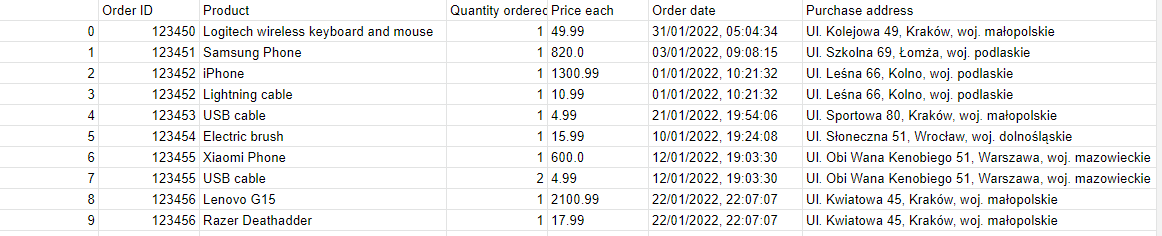

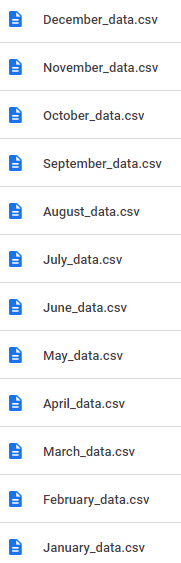